In [7]:
import os
from google.colab import drive

# Navigate to Directory
drive.mount('/content/drive')

# # Tianhan's Path
# os.chdir("./drive/MyDrive/Spring 2024/DSO 574/Assignment 3")

# Manhui's Path
os.chdir("/content/drive/MyDrive/3")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.1 MB/s eta 0:00:00


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from fuzzywuzzy import process
# from fuzzywuzzy import fuzz
from tqdm import tqdm

filepath = './Streaming Assignment/'

In [ ]:
# amazon_prime = pd.read_excel('/content/drive/MyDrive/Spring 2024/DSO 574/Assignment 3/Streaming Assignment/Ampere Analytics Data - OPTIONAL/Amazon Prime (excluding Amazon Other) catalogue USA 2016-2020.xlsx')
# netflix = pd.read_excel('/content/drive/MyDrive/Spring 2024/DSO 574/Assignment 3/Streaming Assignment/Ampere Analytics Data - OPTIONAL/Netflix catalogue USA 2016-2020.xlsx')

In [ ]:
reach_data = pd.read_csv(filepath+'Nielsen Data - OPTIONAL/Reach Data 2016 to 2020.csv', low_memory=False, index_col=0)
share_data = pd.read_csv(filepath+'Nielsen Data - OPTIONAL/Share Data 2016 to 2020.csv', low_memory=False, index_col=0)

In [ ]:
pd.set_option('display.max_columns', None)

reach_data.head()

,Coverage Area,Market Break,Demographic,Schedule Name,Date,Originator,Program,Playback Period,Units,AA Reach%,AA Reach Proj(units),AA Average Frequency,AA Average Minutes,Spot AA GRP%,Qualified AA GRP%,Spot AA GRP Proj(units),Qualified AA GRP Proj(units),AA Effective Reach(3+),Weighted Intab,PESS,Unified Count,UE (000),UE/Proj Type,File
0,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,COMEDY CENTRAL,CHAPPELLES SHOW,Live+7 Days (+168 Hours) | TV with Digital | L...,6,0.479660,1462132,2.265144,46.518141,22.312874,1.086498,68015665,3311940,0.143063,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
1,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,AMC,BREAKING BAD MARATHON,Live+7 Days (+168 Hours) | TV with Digital | L...,2,0.259126,789885,1.491810,60.093212,15.571688,0.386566,47466710,1178358,0.004686,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
2,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,CBS,"BIG BANG THEORY, THE-1/1",Live+7 Days (+168 Hours) | TV with Digital | L...,1,2.107874,6425370,1.004210,23.547228,49.634597,2.116748,151299653,6452420,0.000407,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
3,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,NBC,BETTER LATE THAN NEVER,Live+7 Days (+168 Hours) | TV with Digital | L...,1,2.038779,6214748,1.048416,40.802890,83.188059,2.137488,253579666,6515641,0.004577,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
4,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,CBS,YOUNG SHELDON 830PM-SP,Live+7 Days (+168 Hours) | TV with Digital | L...,1,1.930053,5883323,1.004236,25.132876,48.507782,1.938229,147864817,5908244,0.000000,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx


In [ ]:
reach_data.shape

(174889, 24)

In [ ]:
reach_data['Date'].min()

' 01/01/2016 '

In [ ]:
reach_data['Date'].max()

' 12/31/2020 '

In [ ]:
reach_data['Originator'].unique()

array([' COMEDY CENTRAL ', ' AMC ', ' CBS ', ' NBC ', ' FOX ', ' ABC ',
       ' TBS NETWORK ', ' FX ', ' ADULT SWIM '], dtype=object)

In [ ]:
share_data.head()

,Coverage Area,Market Break,Demographic,Broadcast Date,Originator,Program Name,Telecast Report Start Time,Summary Type Code,Playback Period,Total Duration,MC US AA %,MC US AA Proj (units),MC US Share AA %,MC US HUT %,MC US HUT Proj (units),Rating Base,MC Weighted Viewing AA Minutes,MC DTVR,PESS,Avg Intab,Avg Scaled Intab,Avg Scaled Installed,UE (000),UE Type,File
0,Total US,Composite,Persons 2 - 99,2017-01-01,ABC,AMER FUNN HOME VIDEOS,19:00:00,COMEDY VARIETY,Live+7 Days (+168 Hours) | TV with Digital | L...,60,2.085934,6292637,5.567520,37.466126,113024063,3.016700e+08,3.775582e+08,"C,M",65696,100197,36246,39699,301670,S,USC Marshall 2017 v2S.xlsx
1,Total US,Composite,Persons 2 - 99,2017-01-01,ABC,CONVICTION,22:00:00,GENERAL DRAMA,Live+7 Days (+168 Hours) | TV with Digital | L...,60,1.328723,4008359,3.762987,35.310329,106520670,3.016700e+08,2.405016e+08,"C,M",65696,100197,36246,39699,301670,S,USC Marshall 2017 v2S.xlsx
2,Total US,Composite,Persons 2 - 99,2017-01-01,AMC,WALKING DEAD MARATHON,19:10:00,GENERAL DRAMA,Live+7 Days (+168 Hours) | TV with Digital | L...,60,0.245754,741365,0.652047,37.689586,113698175,3.016700e+08,4.448191e+07,"C,M",65696,100197,36246,39699,301670,S,USC Marshall 2017 v2S.xlsx
3,Total US,Composite,Persons 2 - 99,2017-01-01,AMC,WALKING DEAD MARATHON,20:10:00,GENERAL DRAMA,Live+7 Days (+168 Hours) | TV with Digital | L...,85,0.271637,819448,0.696842,38.981200,117594586,3.016700e+08,6.965312e+07,"C,M",65696,100197,36246,39699,301670,S,USC Marshall 2017 v2S.xlsx
4,Total US,Composite,Persons 2 - 99,2017-01-01,AMC,WALKING DEAD MARATHON,21:35:00,GENERAL DRAMA,Live+7 Days (+168 Hours) | TV with Digital | L...,60,0.251342,758225,0.675303,37.219228,112279247,3.016700e+08,4.549348e+07,"C,M",65696,100197,36246,39699,301670,S,USC Marshall 2017 v2S.xlsx


In [10]:
# # Tianhan's Path
# Reel_good_data = pd.read_csv(filepath+'ReelGood Data/Reel Good Data (Title+Service+Genre+Tag List).csv', low_memory=False, index_col=0)

# Manhui's Path
Reel_good_data = pd.read_csv('./Reelgood/Reel Good Data (Title+Service+Genre+Tag List).csv')

<ipython-input-10-35ff577bf699>:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  Reel_good_data = pd.read_csv('./Reelgood/Reel Good Data (Title+Service+Genre+Tag List).csv')


In [11]:
Reel_good_data.head()

,Unnamed: 0,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
0,0,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Crime,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
1,1,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Drama,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
2,2,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Drama,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
3,3,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Action & Adventure,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
4,4,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Fantasy,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1


In [12]:
Reel_good_data[Reel_good_data['Title'] == 'Breaking Bad']

,Unnamed: 0,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
0,0,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Crime,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
1,1,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Drama,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1


In [13]:
Reel_good_data[Reel_good_data['Title'] == 'Game of Thrones']

,Unnamed: 0,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
2,2,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Drama,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
3,3,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Action & Adventure,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
4,4,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Fantasy,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
5,5,Game of Thrones,/show/game-of-thrones-2011,tv,hbo,Drama,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
6,6,Game of Thrones,/show/game-of-thrones-2011,tv,hbo,Action & Adventure,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
7,7,Game of Thrones,/show/game-of-thrones-2011,tv,hbo,Fantasy,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1


In [14]:
df = Reel_good_data.dropna(subset=['IMDB', 'ReelGood'])

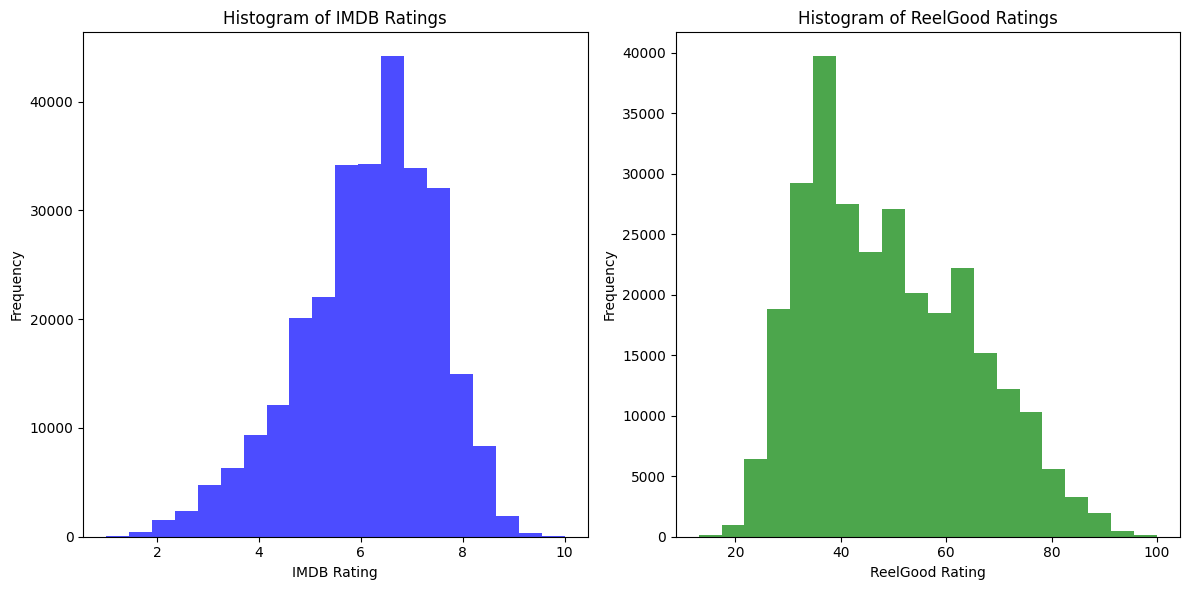

In [15]:
# Creating histograms for the 'IMDB' and 'ReelGood' ratings
plt.figure(figsize=(12, 6))

# Histogram for IMDB ratings
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['IMDB'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')

# Histogram for ReelGood ratings
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(df['ReelGood'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of ReelGood Ratings')
plt.xlabel('ReelGood Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

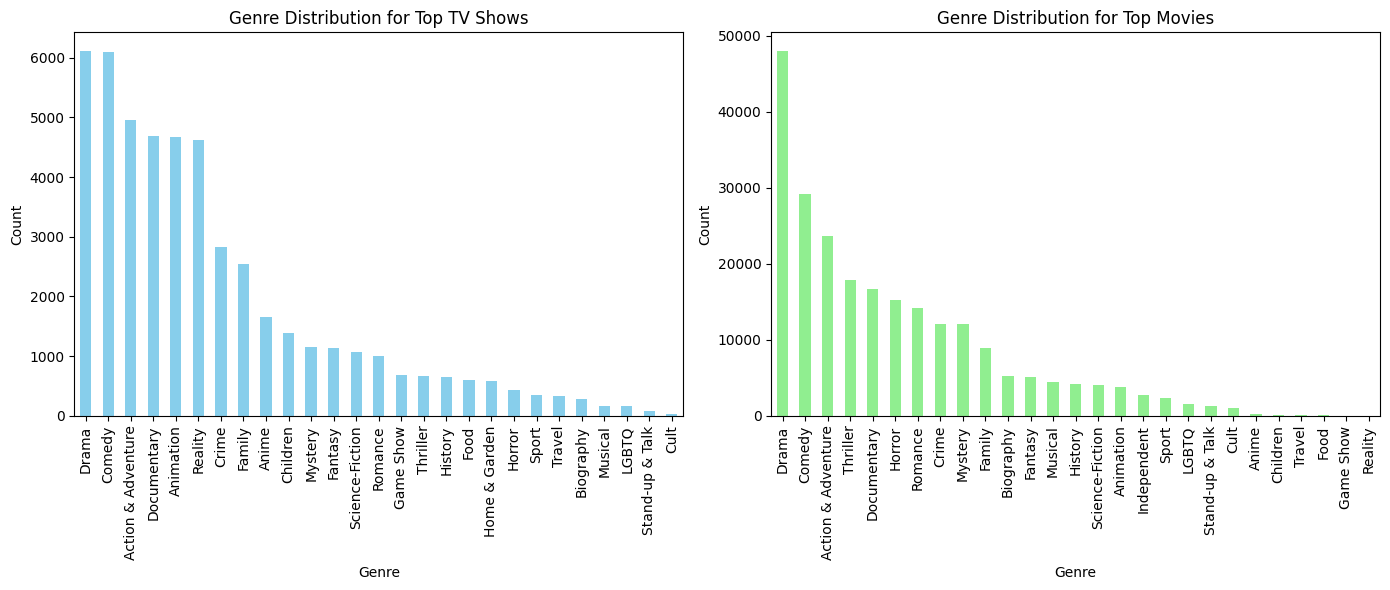

In [16]:
# Separate data into TV and movies
tv_data = df[df['Type'] == 'tv']
movie_data = df[df['Type'] == 'movies']

# Count genres for TV and movies
tv_genre_counts = tv_data['Genre'].value_counts()
movie_genre_counts = movie_data['Genre'].value_counts()

# Plotting the bar graphs for TV and Movie genre counts
plt.figure(figsize=(14, 6))

# TV genre count bar graph
plt.subplot(1, 2, 1)
tv_genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution for Top TV Shows')
plt.xlabel('Genre')
plt.ylabel('Count')

# Movie genre count bar graph
plt.subplot(1, 2, 2)
movie_genre_counts.plot(kind='bar', color='lightgreen')
plt.title('Genre Distribution for Top Movies')
plt.xlabel('Genre')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

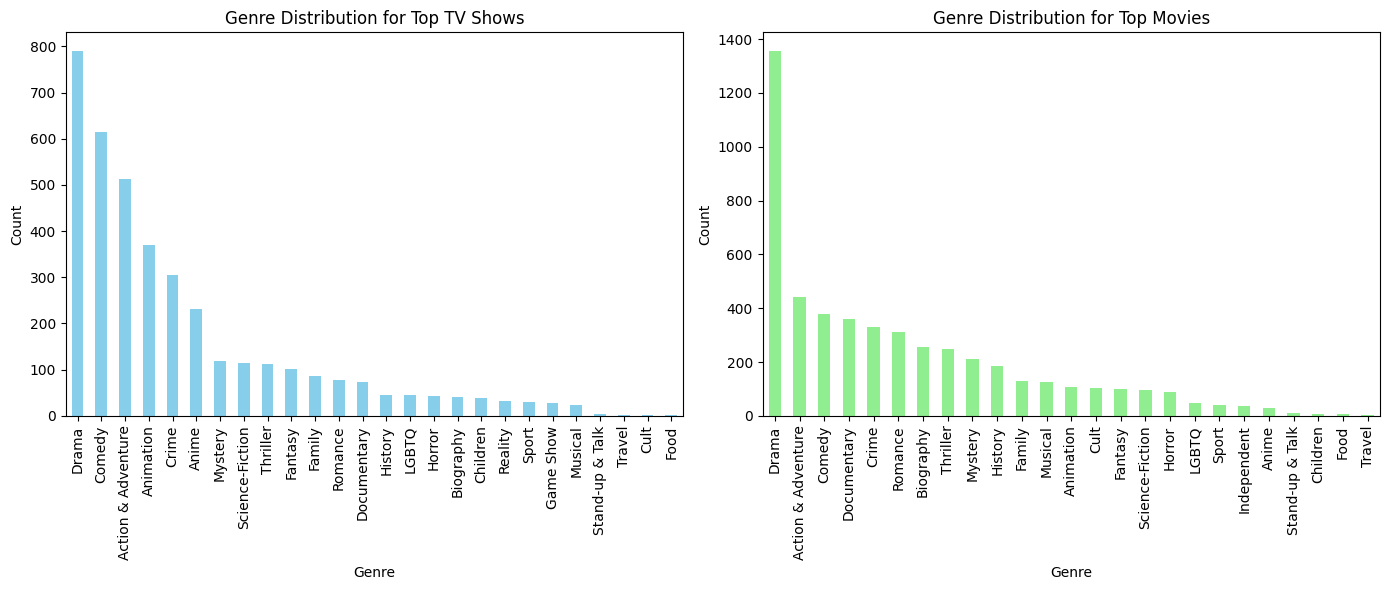

In [17]:
imdb_90_quantile = df['IMDB'].quantile(0.9)
reelgood_90_quantile = df['ReelGood'].quantile(0.9)

# Filter data that is higher than the 90th percentile for both ratings
top_data = df[(df['IMDB'] > imdb_90_quantile) & (df['ReelGood'] > reelgood_90_quantile)]

# Separate data into TV and movies
tv_data = top_data[top_data['Type'] == 'tv']
movie_data = top_data[top_data['Type'] == 'movies']

# Count genres for TV and movies
tv_genre_counts = tv_data['Genre'].value_counts()
movie_genre_counts = movie_data['Genre'].value_counts()

# Plotting the bar graphs for TV and Movie genre counts
plt.figure(figsize=(14, 6))

# TV genre count bar graph
plt.subplot(1, 2, 1)
tv_genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution for Top TV Shows')
plt.xlabel('Genre')
plt.ylabel('Count')

# Movie genre count bar graph
plt.subplot(1, 2, 2)
movie_genre_counts.plot(kind='bar', color='lightgreen')
plt.title('Genre Distribution for Top Movies')
plt.xlabel('Genre')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# # Calculate percentages for TV and Movie genre counts
# tv_genre_percentages = tv_genre_counts / tv_genre_counts.sum() * 100
# movie_genre_percentages = movie_genre_counts / movie_genre_counts.sum() * 100

# # Plotting the percentage bar graphs for TV and Movie genres
# plt.figure(figsize=(14, 7))

# # TV genre percentage bar graph
# plt.subplot(1, 2, 1)
# tv_genre_percentages.plot(kind='bar', color='skyblue', alpha=0.75)
# plt.title('Genre Distribution for Top TV Shows (Percentage)')
# plt.xlabel('Genre')
# plt.ylabel('Percentage')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# plt.ylim(0, max(tv_genre_percentages) * 1.1)  # Adjust y-axis limit to add some space

# # Movie genre percentage bar graph
# plt.subplot(1, 2, 2)
# movie_genre_percentages.plot(kind='bar', color='lightgreen', alpha=0.75)
# plt.title('Genre Distribution for Top Movies (Percentage)')
# plt.xlabel('Genre')
# plt.ylabel('Percentage')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# plt.ylim(0, max(movie_genre_percentages) * 1.1)  # Adjust y-axis limit to add some space

# plt.tight_layout()
# plt.show()

## Genre with high rating but fewer shows available

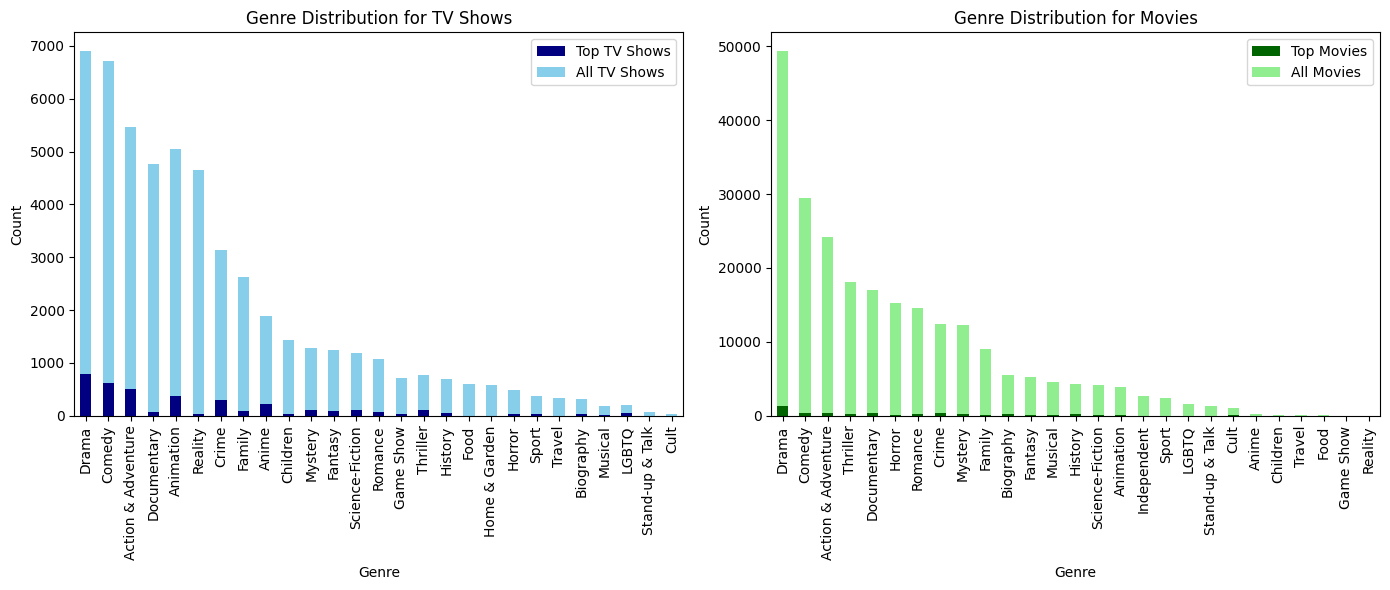

In [18]:
# Assuming 'df' is your main dataframe and 'top_data' has already been defined
# Calculate genre counts for all TV shows and movies
tv_genre_counts = df[df['Type'] == 'tv']['Genre'].value_counts()
movie_genre_counts = df[df['Type'] == 'movies']['Genre'].value_counts()

# Calculate genre counts for top TV shows and movies
top_tv_genre_counts = top_data[top_data['Type'] == 'tv']['Genre'].value_counts()
top_movie_genre_counts = top_data[top_data['Type'] == 'movies']['Genre'].value_counts()

# Reindex top data to match the full genre counts to ensure alignment in the plot
top_tv_genre_counts = top_tv_genre_counts.reindex(tv_genre_counts.index, fill_value=0)
top_movie_genre_counts = top_movie_genre_counts.reindex(movie_genre_counts.index, fill_value=0)

# Plotting the bar graphs for TV and Movie genre counts with stacking
plt.figure(figsize=(14, 6))

# TV genre count bar graph with stacking
plt.subplot(1, 2, 1)
top_tv_genre_counts.plot(kind='bar', color='navy', label='Top TV Shows')
tv_genre_counts.plot(kind='bar', color='skyblue', bottom=top_tv_genre_counts, label='All TV Shows')
plt.title('Genre Distribution for TV Shows')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend()

# Movie genre count bar graph with stacking
plt.subplot(1, 2, 2)
top_movie_genre_counts.plot(kind='bar', color='darkgreen', label='Top Movies')
movie_genre_counts.plot(kind='bar', color='lightgreen', bottom=top_movie_genre_counts, label='All Movies')
plt.title('Genre Distribution for Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
genres = top_data['Genre'].unique()

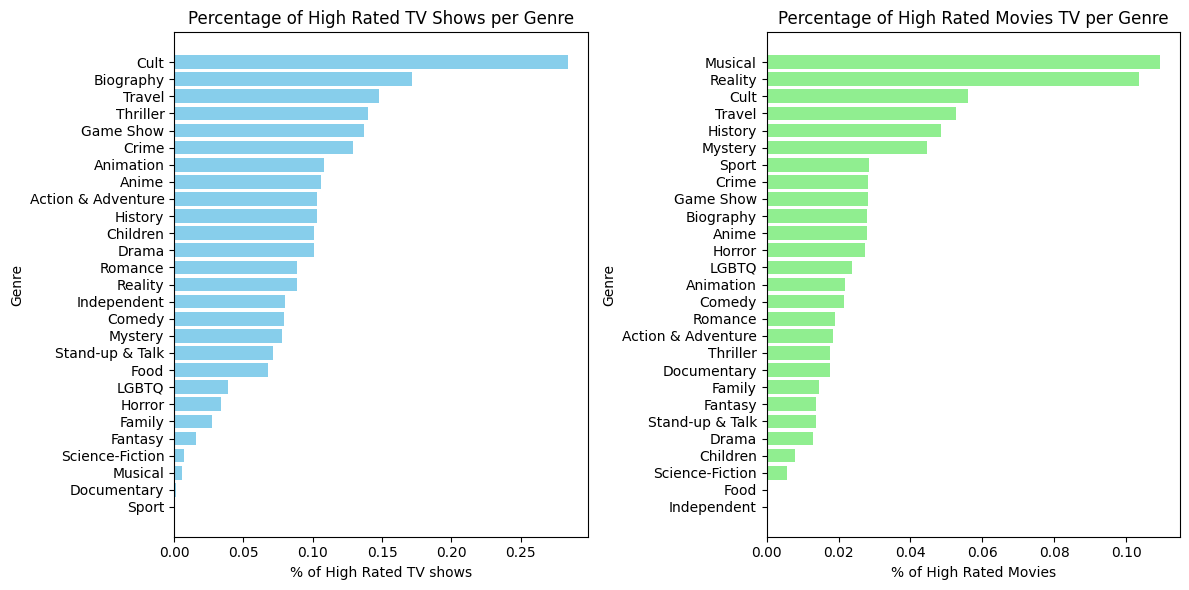

In [29]:
# calculate ratio
top_tv_genre_ratio = top_tv_genre_counts/tv_genre_counts
top_movie_genre_ratio = top_movie_genre_counts/movie_genre_counts

# Sort data based on top_tv_genre_ratio
tv_sorted_indices = sorted(range(len(top_tv_genre_ratio)), key=lambda k: top_tv_genre_ratio[k], reverse=True)
genres_sorted_tv = [genres[i] for i in tv_sorted_indices]
top_tv_genre_ratio_sorted = [top_tv_genre_ratio[i] for i in tv_sorted_indices]

# Sort data based on top_movie_genre_ratio
movie_sorted_indices = sorted(range(len(top_movie_genre_ratio)), key=lambda k: top_movie_genre_ratio[k], reverse=True)
genres_sorted_movie = [genres[i] for i in movie_sorted_indices]
top_movie_genre_ratio_sorted = [top_movie_genre_ratio[i] for i in movie_sorted_indices]

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First plot
ax1.barh(genres_sorted_tv, top_tv_genre_ratio_sorted, color='skyblue')
ax1.set_xlabel('% of High Rated TV shows')
ax1.set_ylabel('Genre')
ax1.set_title('Percentage of High Rated TV Shows per Genre')
ax1.invert_yaxis()  # Invert y-axis to have the highest value at the top

# Second plot
ax2.barh(genres_sorted_movie, top_movie_genre_ratio_sorted, color='lightgreen')
ax2.set_xlabel('% of High Rated Movies')
ax2.set_ylabel('Genre')
ax2.set_title('Percentage of High Rated Movies TV per Genre')
ax2.invert_yaxis()  # Invert y-axis to have the highest value at the top

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Genre with highest average seaon per show

In [ ]:
# Splitting the DataFrame by type
tv_df = df[df['Type'] == 'tv']
movies_df = df[df['Type'] == 'movies']

# Converting 'Seasons' to numeric, just in case it's not (comment out if already numeric)
tv_df['Seasons'] = pd.to_numeric(tv_df['Seasons'], errors='coerce')
movies_df['Seasons'] = pd.to_numeric(movies_df['Seasons'], errors='coerce')

# Calculating the average number of seasons per genre for TV shows
avg_seasons_per_genre_tv = tv_df.groupby('Genre')['Seasons'].mean()

# Calculating the average number of seasons per genre for Movies (if applicable)
avg_seasons_per_genre_movies = movies_df.groupby('Genre')['Seasons'].mean()

<ipython-input-30-f09f3bc756e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['Seasons'] = pd.to_numeric(tv_df['Seasons'], errors='coerce')
<ipython-input-30-f09f3bc756e4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['Seasons'] = pd.to_numeric(movies_df['Seasons'], errors='coerce')


In [ ]:
avg_seasons_per_genre_tv

Genre
Action & Adventure     4.161017
Animation              3.586139
Anime                  2.702097
Biography              4.239583
Children               4.965232
Comedy                 4.322671
Crime                  4.259375
Cult                   2.900000
Documentary            6.053773
Drama                  3.732628
Family                 4.963755
Fantasy                3.273481
Food                   7.723404
Game Show              9.766187
History                3.543919
Home & Garden         21.800000
Horror                 3.849057
LGBTQ                  3.731481
Musical                4.710526
Mystery                4.307220
Reality                7.805499
Romance                4.687500
Science-Fiction        3.298466
Sport                  7.533074
Stand-up & Talk        8.161290
Thriller               3.694656
Travel                 7.268657
Name: Seasons, dtype: float64

In [ ]:
avg_seasons_per_genre_movies

Genre
Action & Adventure   NaN
Animation            NaN
Anime                NaN
Biography            NaN
Children             NaN
Comedy               NaN
Crime                NaN
Cult                 NaN
Documentary          NaN
Drama                NaN
Family               NaN
Fantasy              NaN
Food                 NaN
Game Show            NaN
History              NaN
Horror               NaN
Independent          NaN
LGBTQ                NaN
Musical              NaN
Mystery              NaN
Reality              NaN
Romance              NaN
Science-Fiction      NaN
Sport                NaN
Stand-up & Talk      NaN
Thriller             NaN
Travel               NaN
Name: Seasons, dtype: float64

## Merge

In [ ]:
# Select only numerical columns except 'Program' which is for grouping
numerical_cols = reach_data.select_dtypes(include=['number'])

# Group by 'Program' which is not a numerical column, calculate the mean of all numerical features
average_by_program = reach_data.groupby('Program')[numerical_cols.columns].mean()

# Resetting the index to turn the grouped-by column back into a regular column
average_by_program = average_by_program.reset_index()

In [ ]:
average_by_program

,Program,Units,AA Reach%,AA Reach Proj(units),AA Average Frequency,AA Average Minutes,Spot AA GRP%,Qualified AA GRP%,Spot AA GRP Proj(units),Qualified AA GRP Proj(units),AA Effective Reach(3+),Weighted Intab,PESS,Unified Count,UE (000)
0,2 BROKE GIRLS,2.283582,0.962277,1.632116e+06,1.137784,25.992485,27.658063,1.170746,4.693694e+07,1.985742e+06,0.037564,1.352835e+08,18215.139756,30300.474898,135423.451832
1,2 BROKE GIRLS SPECIAL-7/4,1.000000,0.819693,1.440309e+06,0.821332,19.338790,19.336487,0.822651,3.389635e+07,1.445146e+06,0.000000,1.349223e+08,18150.363636,30201.818182,135072.272727
2,2 BROKE GIRLS-ENC,1.000000,1.086111,1.840046e+06,0.823422,19.322331,25.643278,1.094533,4.341631e+07,1.854540e+06,0.000694,1.371225e+08,18544.909091,30802.727273,137211.272727
3,2 BROKE GIRLS-SPECIAL,1.000000,1.018476,1.727563e+06,0.819223,14.804893,18.288500,1.019737,3.126198e+07,1.729752e+06,0.000000,1.363891e+08,18413.393939,30602.424242,136498.272727
4,24: LEGACY,1.000000,1.974521,3.359505e+06,0.864610,36.142937,87.198472,2.087812,1.484888e+08,3.556034e+06,0.009046,1.371225e+08,18544.909091,30802.727273,137211.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,YOUNG SHELDON-THANKS-SPC,1.000000,1.778337,2.775263e+06,0.825136,19.404975,42.076897,1.792953,6.518610e+07,2.798201e+06,0.000572,1.392616e+08,22348.909091,37205.909091,139300.409091
1614,ZOEYS XTRAORD PLYLST,1.000000,1.074219,1.824153e+06,0.854576,33.010718,43.249172,1.121441,7.438687e+07,1.911036e+06,0.005294,1.396874e+08,25538.636364,41885.909091,139706.000000
1615,ZOEYS XTRAORD PLYLST 2/16,1.000000,0.771945,1.245312e+06,0.832007,28.107085,26.168542,0.784592,4.289118e+07,1.266208e+06,0.000624,1.396874e+08,25538.636364,41885.909091,139706.000000
1616,ZOO,1.000000,1.718216,2.927106e+06,0.865753,36.153305,78.223786,1.817567,1.333990e+08,3.094975e+06,0.009399,1.361141e+08,18364.075758,30527.310606,136230.897727


In [ ]:
tqdm.pandas()

def get_closest_match(x, other_series, scorer=fuzz.partial_ratio):
    """
    x is the title from the first dataframe.
    other_series is the series of titles from the second dataframe to match against.
    scorer is the fuzzywuzzy scorer function being used to find the closest match.
    """
    best_match = process.extractOne(x, other_series, scorer=scorer)
    return best_match[0]

# Applying the function to find closest matches in df2['Program'] for each entry in df1['Title']
average_by_program['matched_program'] = df['Title'].progress_apply(get_closest_match, other_series=average_by_program['Program'])

# Now perform the merge based on the new 'matched_program' column in df1 and 'Program' in df2
merged_df = pd.merge(df, average_by_program, left_on='matched_program', right_on='Program', how='left')

merged_df.head()

NameError: name 'tqdm' is not defined

## Keywords

In [ ]:
!pip install rake-nltk

In [ ]:
import nltk
import spacy
from rake_nltk import Rake
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import Counter
from itertools import chain

import ast  # for safely evaluating strings containing Python expressions
from collections import Counter
from wordcloud import WordCloud

from tqdm.auto import tqdm

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def extract_keywords_nltk(description):
    # Check if description is not a string
    if not isinstance(description, str):
        return []  # Return an empty list if non-string

    stop_words = set(stopwords.words('english'))
    words = word_tokenize(description)
    keywords = [word for word in words if word not in stop_words and word.isalpha()]
    return keywords

tqdm.pandas(desc="Extracting keywords")
df['Keywords_NLTK'] = df["What it's about"].progress_apply(extract_keywords_nltk)

Extracting keywords:   0%|          | 0/283308 [00:00<?, ?it/s]

<ipython-input-14-aac5dc006c7c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Keywords_NLTK'] = df["What it's about"].progress_apply(extract_keywords_nltk)


In [ ]:
def extract_keywords_rake(description):
    # Check if description is not a string
    if not isinstance(description, str):
        return []  # Return an empty list if non-string

    r = Rake()
    r.extract_keywords_from_text(description)
    return r.get_ranked_phrases()[:5]  # top 5 phrases

tqdm.pandas(desc="Extracting keywords")
df['Keywords_RAKE'] = df["What it's about"].progress_apply(extract_keywords_rake)

Extracting keywords:   0%|          | 0/283308 [00:00<?, ?it/s]

<ipython-input-15-037dabe2ae99>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Keywords_RAKE'] = df["What it's about"].progress_apply(extract_keywords_rake)


In [ ]:


# Assuming 'df' is your DataFrame
# Sample DataFrame loading (replace this with your actual DataFrame loading)
# df = pd.read_csv('your_dataset.csv')

# More efficient flattening of the list using itertools.chain
all_keywords = list(chain.from_iterable(df['Keywords_NLTK']))

# Count the frequency of each keyword
keyword_frequency = Counter(all_keywords)

# Convert the Counter object to a DataFrame for better visualization
keyword_frequency_df = pd.DataFrame(keyword_frequency.items(), columns=['Keyword', 'Frequency'])

# Display the frequency table sorted by frequency in descending order
keyword_frequency_df = keyword_frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
print(keyword_frequency_df)

         Keyword  Frequency
0            The      40204
1              A      35257
2           life      21170
3            one      18407
4          young      18401
...          ...        ...
61984  Alexeieff          1
61985  readiness          1
61986   Nurnberg          1
61987      NSDAP          1
61988    potable          1

[61989 rows x 2 columns]


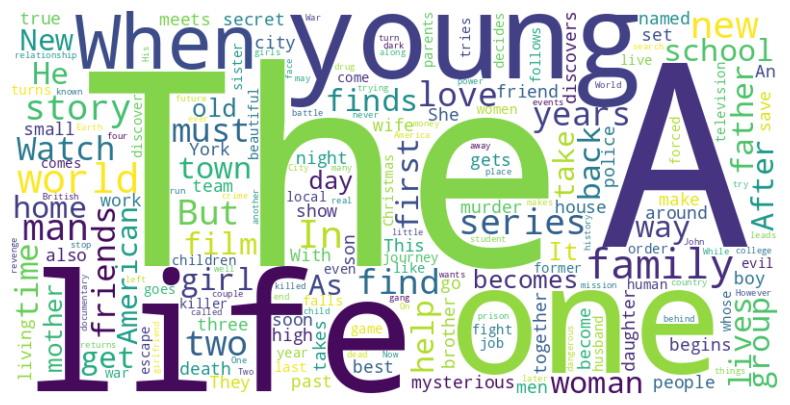

In [ ]:
# Generate a word cloud using the frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_frequency)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Function to filter out stop words and keep only nouns and adjectives
def filter_keywords(row):
    # Create a doc object
    doc = nlp(row['Keyword'].lower())
    # Keep the word if it's a noun or adjective and not a stop word
    return [(token.text, row['Frequency']) for token in doc if not token.is_stop and token.pos_ in ('NOUN', 'ADJ')]

# Apply the function to each row in the DataFrame
filtered_keywords = [item for sublist in keyword_frequency_df.apply(filter_keywords, axis=1).tolist() for item in sublist]

# Create a new DataFrame from the filtered keywords
filtered_df = pd.DataFrame(filtered_keywords, columns=['Keyword', 'Frequency'])

# Summing up the frequencies if there are duplicate keywords
filtered_df = filtered_df.groupby('Keyword').sum().reset_index()

# Sort by frequency in descending order
filtered_df = filtered_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

print(filtered_df)

             Keyword  Frequency
0               life      21695
1                new      20708
2              young      19262
3              world      18367
4             family      16475
...              ...        ...
26314       conjurer          1
26315      statesmen          1
26316  connectedness          1
26317          marex          1
26318         sangue          1

[26319 rows x 2 columns]


In [ ]:
# # Load the English tokenizer, tagger, parser, NER, and word vectors
# nlp = spacy.load("en_core_web_sm")

# # Function to filter out stop words and non-nouns
# def filter_keywords(row):
#     # Create a doc object
#     doc = nlp(row['Keyword'].lower())
#     # Keep the word if it's a noun and not a stop word
#     return [(token.text, row['Frequency']) for token in doc if not token.is_stop and token.pos_ == 'NOUN']

# # Apply the function to each row in the DataFrame
# filtered_keywords = [item for sublist in keyword_frequency_df.apply(filter_keywords, axis=1).tolist() for item in sublist]

# # Create a new DataFrame from the filtered keywords
# filtered_df = pd.DataFrame(filtered_keywords, columns=['Keyword', 'Frequency'])

# # Summing up the frequencies if there are duplicate keywords
# filtered_df = filtered_df.groupby('Keyword').sum().reset_index()

# # Sort by frequency in descending order
# filtered_df = filtered_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# print(filtered_df)

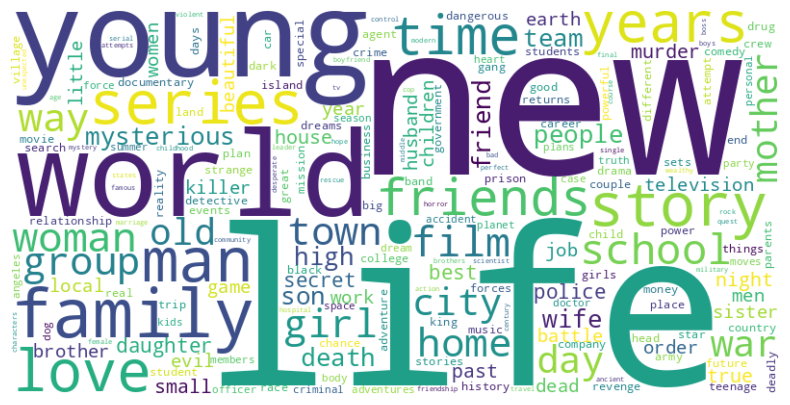

In [ ]:
# Convert DataFrame to dictionary with keywords as keys and frequencies as values
freq_dict = filtered_df.set_index('Keyword')['Frequency'].to_dict()

# Generate a word cloud using the frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()